In [11]:
#import opticalflow
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path
import time
import os

In [2]:
def imshow(img):
    plt.figure(dpi=150)
    plt.imshow(img)
    plt.show()
    plt.close()

E:\Master\M6 - Video analysis\Project\AICity_data\train\S03\c010\vdo_frames\00001.jpg00001


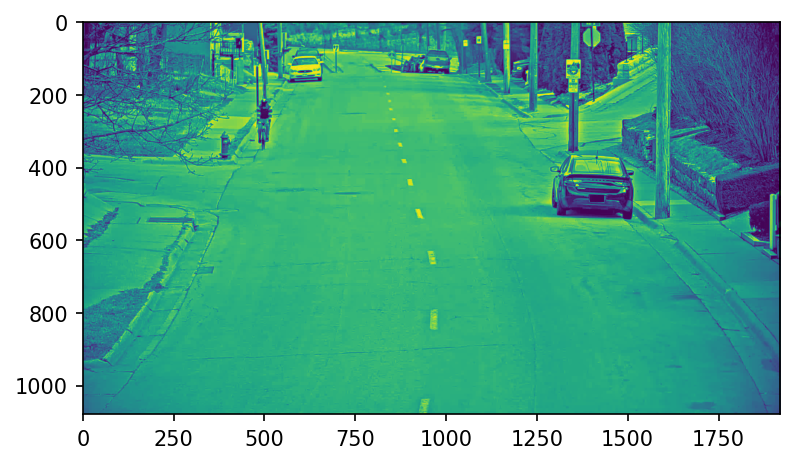

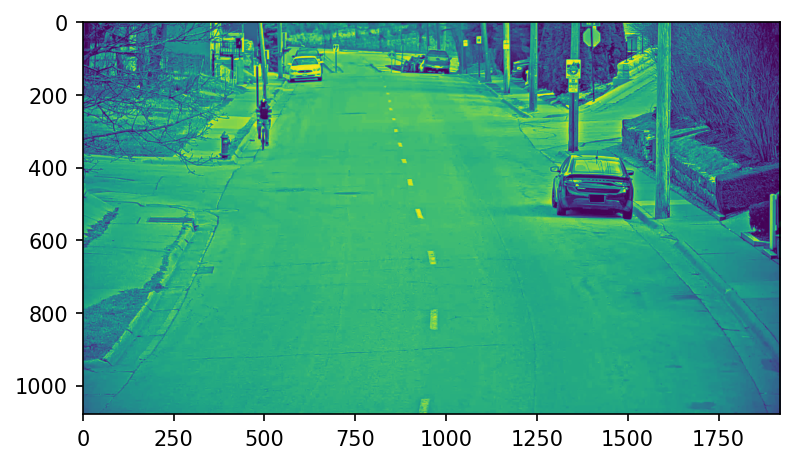

In [16]:
who = 'dani'

if who == 'pau':
    frames_path = Path(
        "/home/pau/Documents/master/M6/project/data/AICity_data/AICity_data/train/"
        "S03/c010/vdo_frames")
elif who == 'dani':
    frames_path = Path(
        "E:/Master/M6 - Video analysis/Project/AICity_data/train/S03/c010/vdo_frames")

prev = cv2.imread(str(frames_path / "00001.jpg00001.jpg"), cv2.IMREAD_GRAYSCALE)
post = cv2.imread(str(frames_path / "00002.jpg00002.jpg"), cv2.IMREAD_GRAYSCALE)

imshow(prev)
imshow(post)

In [17]:
const_type = "forward"
block_size = 64
search_radius = 48

In [18]:
def mse(ref, tar):
    return ((ref - tar)**2).mean()

In [19]:
from sklearn.feature_extraction.image import extract_patches_2d
import time

tick = time.time()

if const_type == "forward":
    reference = prev
    target = post
else:
    reference = post
    target = prev

assert reference.shape == target.shape, "Image sizes do not match"

reference = reference.astype(float)
target = target.astype(float)

height, width = reference.shape
nheight, nwidth = int(np.ceil(height / block_size)) * block_size, \
                  int(np.ceil(width / block_size)) * block_size

vblocks = nheight // block_size
hblocks = nwidth // block_size

nreference = np.full((nheight, nwidth), np.mean(reference.flatten()))
nreference[:height, :width] = reference

nreference = nreference.reshape(
    vblocks,
    block_size,
    hblocks,
    block_size,
    # channels if rgb
)
nreference = nreference.swapaxes(1, 2).reshape((-1, block_size, block_size))

for ind_ref, block in enumerate(nreference):
    top = max(0, ((ind_ref % vblocks) * block_size) - search_radius)
    left = max(0, ((ind_ref % hblocks) * block_size) - search_radius)
    bot = min(height, block_size + top + search_radius)
    right = min(width, block_size + left + search_radius)

    patches = extract_patches_2d(
        target[top:bot, left:right],
        patch_size=(block_size, block_size),
    )

    mse_matrix = ((block[None, :] - patches[:, None])**2).mean()

    # mse_matrix = np.zeros(len(patches))
    # for ind_tar, patch in enumerate(patches):
    #     mse_matrix[ind_tar] = mse(block, patch)


    # for x in range(max(0, left), min(right, width) - block_size):
    #     for y in range(max(0, top), min(left, width) - block_size):
    #         comp = target[y:y+block_size, x:x+block_size]
    #         mse_matrix[y - top, x - left] = mse(block,comp)
    # print(mse_matrix)
tock = time.time() - tick
tock

58.20856738090515

In [20]:
reference.shape

(1080, 1920)

In [21]:
nreference.shape

(510, 64, 64)

TypeError: Invalid shape (510, 64, 64) for image data

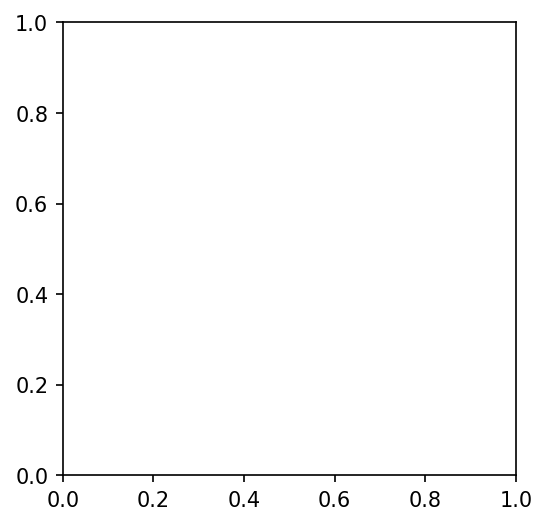

In [22]:
imshow(nreference)